In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
# Simulate dataset

np.random.seed(42)
K = 3
T = 1000
true_probabilities = [0.2, 0.5, 0.75]

def simulate_dataset(true_probabilities, T):
    data = np.zeros((T, len(true_probabilities)))
    for i in range(len(true_probabilities)):
        data[:, i] = np.random.binomial(1, true_probabilities[i], T)
    return data

data = simulate_dataset(true_probabilities, T)

### UCB Formula

$$
A_t = \arg \max_i \left( \hat{r}_i + \sqrt{\frac{2 \log(t)}{n_i}} \right)
$$


In [3]:
# UCB Algorithm

def ucb(T, K, data):
    rewards = np.zeros(T)
    arm_counts = np.zeros(K)
    average_rewards = np.zeros(K)

    for t in range(K):
        rewards[t] = data[t, t]
        arm_counts[t] += 1
        average_rewards[t] = rewards[t]
    
    for t in range(K, T):
        ucb_values = average_rewards + np.sqrt(2 * np.log(t + 1) / arm_counts)
        arm = np.argmax(ucb_values)
        reward = data[t, arm]
        rewards[t] = reward
        arm_counts[arm] += 1
        average_rewards[arm] = ((arm_counts[arm] - 1) * average_rewards[arm] + reward) / arm_counts[arm]

    return rewards

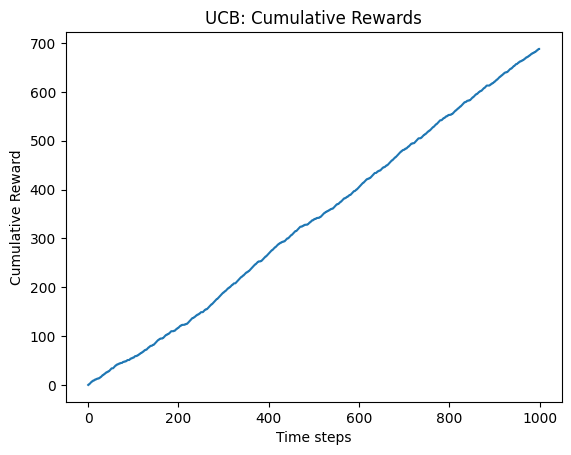

In [4]:
# Run UCB and plot cumulative rewards

ucb_rewards = ucb(T, K, data)
plt.plot(np.cumsum(ucb_rewards))
plt.title('UCB: Cumulative Rewards')
plt.xlabel('Time steps')
plt.ylabel('Cumulative Reward')
plt.show()

### Thompson Sampling Formula

$$
\theta_i = \text{sample from } Beta(\alpha_i + 1, \beta_i + 1)
$$

In [5]:
# Thompson Sampling Algorithm

def thompson_sampling(T, K, data):
    rewards = np.zeros(T)
    successes = np.zeros(K)
    failures = np.zeros(K)

    for t in range(T):
        sampled_theta = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(K)]
        arm = np.argmax(sampled_theta)
        reward = data[t, arm]
        rewards[t] = reward
        if reward == 1:
            successes[arm] += 1
        else:
            failures[arm] += 1

    return rewards

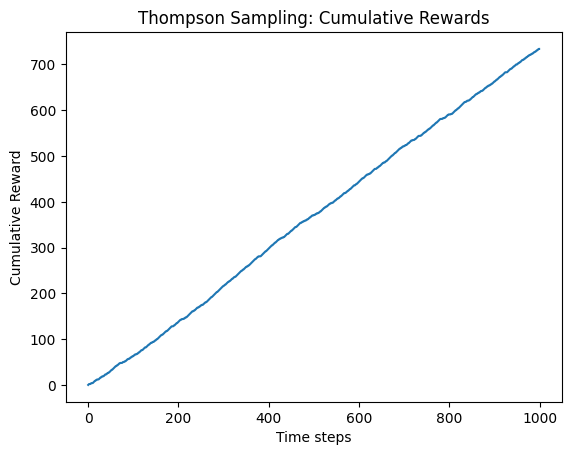

In [6]:
# Run Thompson Sampling and plot cumulative rewards

ts_rewards = thompson_sampling(T, K, data)
plt.plot(np.cumsum(ts_rewards))
plt.title('Thompson Sampling: Cumulative Rewards')
plt.xlabel('Time steps')
plt.ylabel('Cumulative Reward')
plt.show()

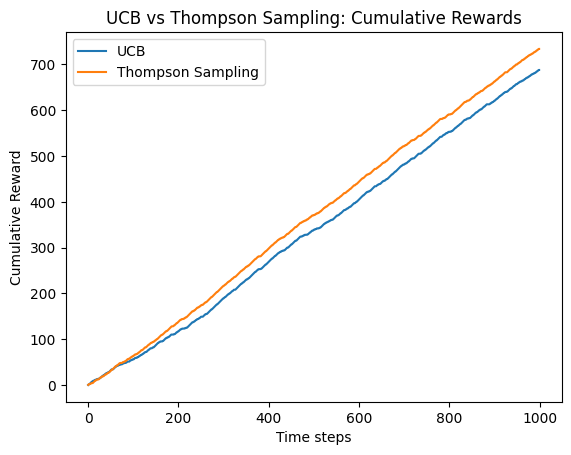

In [7]:
# Compare UCB and Thompson Sampling

plt.plot(np.cumsum(ucb_rewards), label='UCB')
plt.plot(np.cumsum(ts_rewards), label='Thompson Sampling')
plt.title('UCB vs Thompson Sampling: Cumulative Rewards')
plt.xlabel('Time steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()